As always, we start by loading our modules and doing a bit of set up:



In [78]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



## Class Dataset

We are going to start by loading the class dataset. You should have uploaded
this file to your Colab workspace as a CSV file. Then, use `pd.read_csv` to load
the data into Python. Give it an informative name.



In [79]:
fruits = pd.read_csv("fruits.csv")
fruits

,student,item,calories,sugar,fat
0,purplecat,mango,60,14.00,0.40
1,zp,papaya,43,7.80,0.30
2,TojiFushiguro,guava,68,9.00,1.00
3,madmac,passionfruit,17,2.00,0.10
4,giraffe,dragonfruit (pitaya),60,10.00,0.14
5,lw27sl,starfruit (carambola),31,4.00,0.30
6,am8ht,persimmon,70,12.53,0.19
7,bluedog,pomegranate,83,14.00,1.20
8,bananabear,kiwi,42,6.00,0.40
9,bentley,blood orange,50,9.00,0.10




Next, great a column for the number of calories in 200 grams by doubling the
number of calories in 100 grams.



In [80]:
fruits.loc[:, "calories_in_200"] = fruits["calories"] * 2
fruits

,student,item,calories,sugar,fat,calories_in_200
0,purplecat,mango,60,14.00,0.40,120
1,zp,papaya,43,7.80,0.30,86
2,TojiFushiguro,guava,68,9.00,1.00,136
3,madmac,passionfruit,17,2.00,0.10,34
4,giraffe,dragonfruit (pitaya),60,10.00,0.14,120
5,lw27sl,starfruit (carambola),31,4.00,0.30,62
6,am8ht,persimmon,70,12.53,0.19,140
7,bluedog,pomegranate,83,14.00,1.20,166
8,bananabear,kiwi,42,6.00,0.40,84
9,bentley,blood orange,50,9.00,0.10,100




Now, build a column called `sugar_value` that provides a categorical summary of
the sugar content, either "high", "medium", or "low".



In [81]:
fruits.loc[fruits["sugar"] <= 10, "sugar_value"] = "low"
fruits.loc[fruits["sugar"] > 10, "sugar_value"] = "medium"
fruits.loc[fruits["sugar"] > 20, "sugar_value"] = "high"
fruits

,student,item,calories,sugar,fat,calories_in_200,sugar_value
0,purplecat,mango,60,14.00,0.40,120,medium
1,zp,papaya,43,7.80,0.30,86,low
2,TojiFushiguro,guava,68,9.00,1.00,136,low
3,madmac,passionfruit,17,2.00,0.10,34,low
4,giraffe,dragonfruit (pitaya),60,10.00,0.14,120,low
5,lw27sl,starfruit (carambola),31,4.00,0.30,62,low
6,am8ht,persimmon,70,12.53,0.19,140,medium
7,bluedog,pomegranate,83,14.00,1.20,166,medium
8,bananabear,kiwi,42,6.00,0.40,84,low
9,bentley,blood orange,50,9.00,0.10,100,low




If we use the method `.head(10)`, we will get the first ten rows of a DataFrame
object. Use this to get the 10 most caloric food items. Save this as a new
dataset name.



In [82]:
fruits_calorie = fruits.sort_values("calories", ascending = False)
fruits_calorie = fruits_calorie.head(10)
fruits_calorie

,student,item,calories,sugar,fat,calories_in_200,sugar_value
16,zp,coconut,354,33.5,15.00,708,high
29,golden_bear,tamarind,239,39.0,0.60,478,high
19,lw27sl,sapote (black or mamey),124,20.0,0.50,248,medium
15,purplecat,plantain,122,14.0,0.20,244,medium
20,am8ht,jackfruit,94,19.0,0.30,188,medium
7,bluedog,pomegranate,83,14.0,1.20,166,medium
21,bluedog,rambutan,78,15.0,0.25,156,medium
17,TojiFushiguro,fig,74,16.0,0.30,148,medium
28,the_toaster,elderberry,73,8.3,0.50,146,low
24,cheetah,kumquat,71,9.0,0.90,142,low




Finally, in terms of making datasets, create a dataset with only those data from
others at your table. Save this as a new dataset. Hint: You might need to look at
the solutions from the last notebook to make this work.



In [83]:
fruits_group4 = fruits.loc[fruits['student'].isin(["ghaha", "dolphin06", "the_toaster", "purplegiraffe"]),:]
fruits_group4

,student,item,calories,sugar,fat,calories_in_200,sugar_value
11,purplegiraffe,tangerine,53,11.00,0.30,106,medium
12,ghaha,mandarin,47,10.00,0.30,94,low
13,dolphin06,meyer lemon,35,21.00,0.60,70,high
14,the_toaster,key lime,30,2.99,0.20,60,low
25,purplegiraffe,mulberry,43,8.00,0.39,86,low
26,ghaha,boysenberry,66,9.10,0.30,132,low
27,dolphin06,gooseberry,44,6.00,0.58,88,low
28,the_toaster,elderberry,73,8.30,0.50,146,low




Create a scatterplot with calories on the x-axis, sugar on the y-axis, and color
changing by the category of the sugar content.



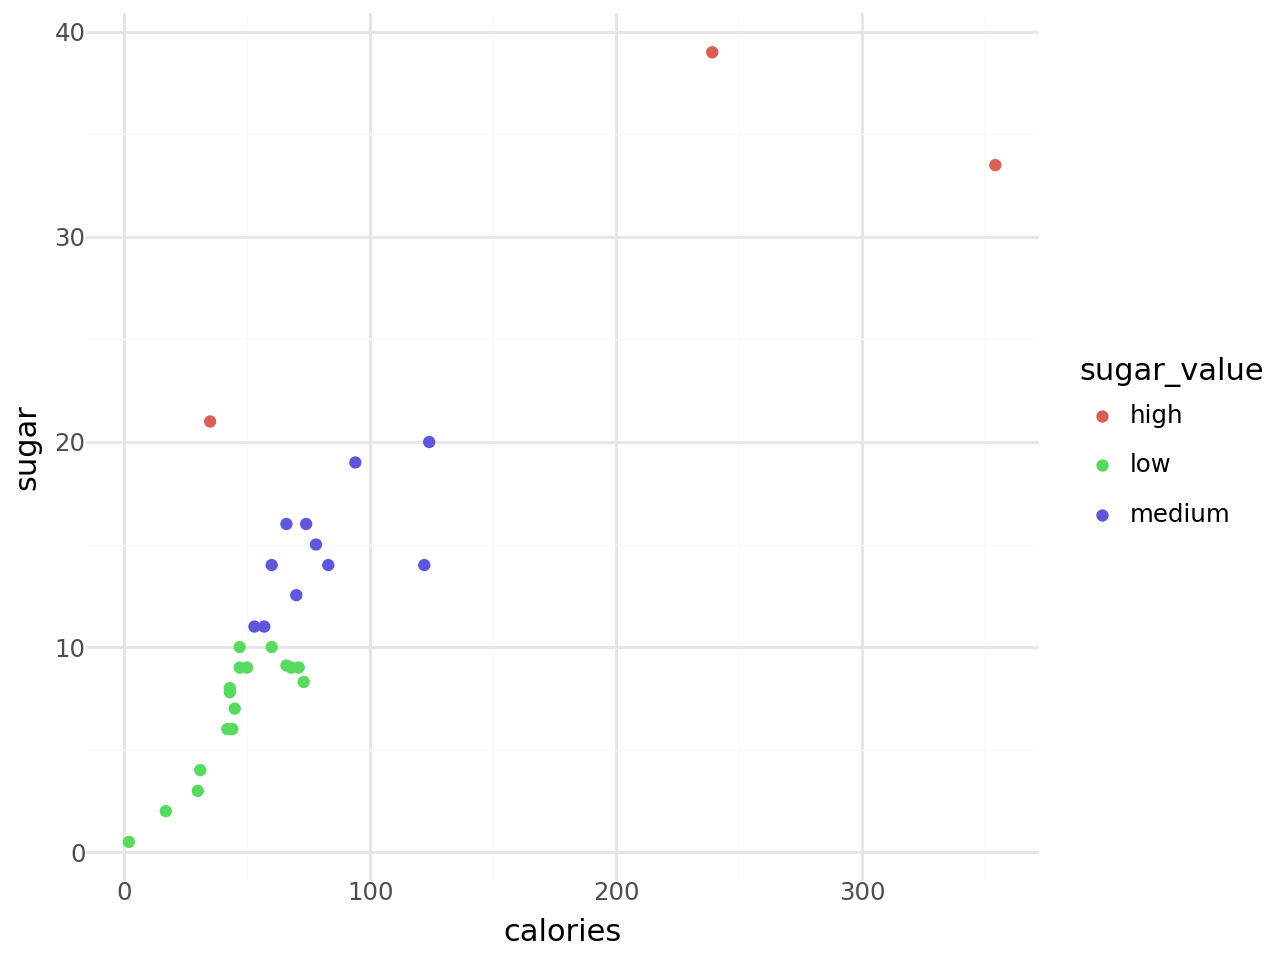

In [84]:
(ggplot(fruits) +
  geom_point(aes(x = "calories", y = "sugar", color = "sugar_value")))



Finally, follow the approach from the last notebook to create a plot with calories
on the x-axis and sugar on the y-axis with the color equal to a light gray. Then
highlight the items from your group and add labels using a different color.
Use the site [https://htmlcolorcodes.com/](https://htmlcolorcodes.com/) to find
a good color. Nudge the labels so that the labels and points are readable.



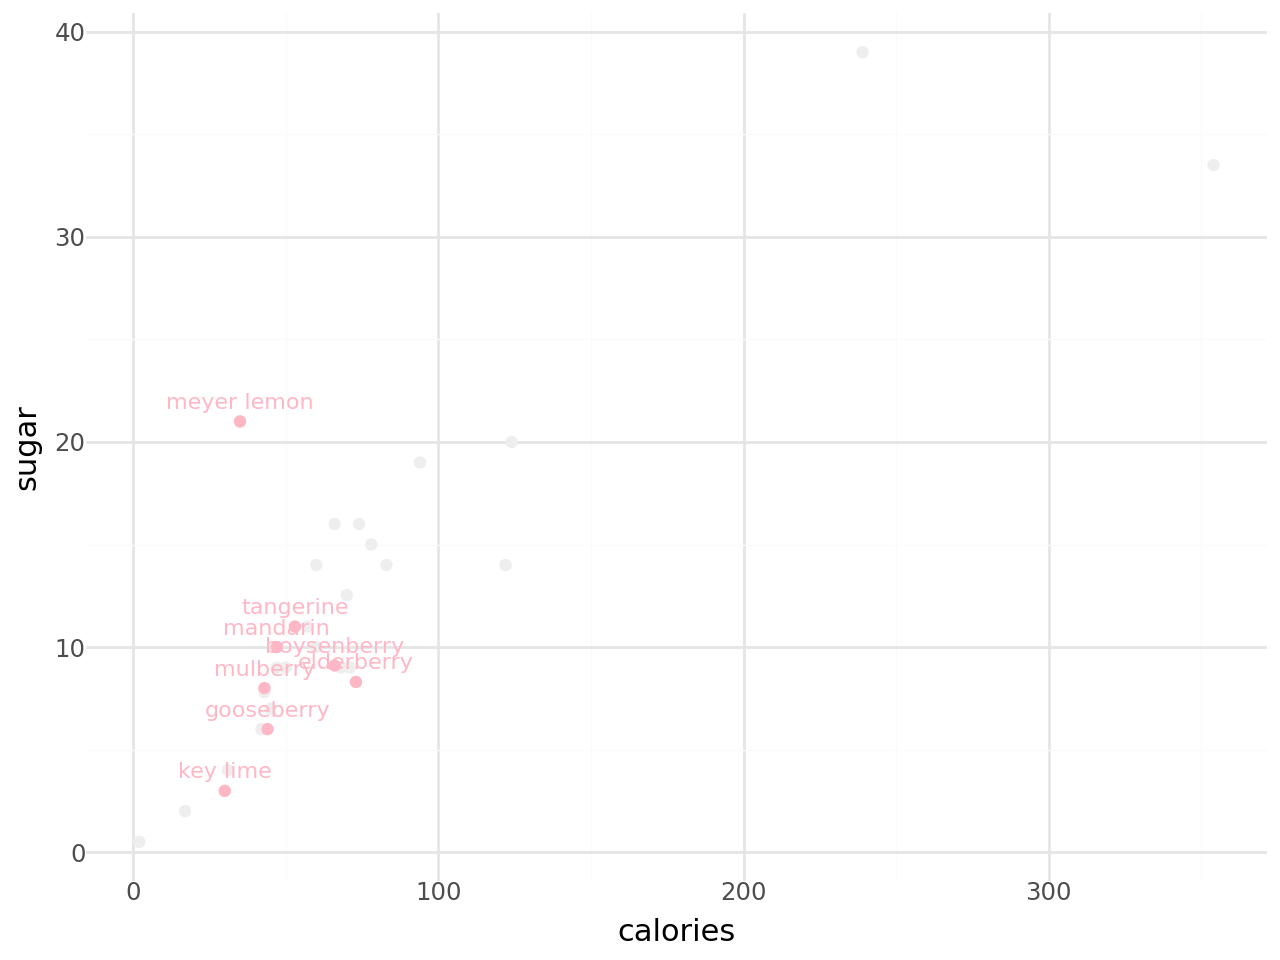

In [85]:
(ggplot(fruits) +
  geom_point(aes(x = "calories", y = "sugar"), color = "#eeeeee") +
  geom_point(aes(x = "calories", y = "sugar"), color = "#ffb7c5", data = fruits_group4) +
  geom_text(aes(x="calories", y="sugar", label="item"), nudge_y = 0.9, color="#ffb7c5", data = fruits_group4, size = 8)
  )



## Polars

As a bit of a divergence, let's see how another Python library called polars
(usually abbreviated to `pl` when loaded in) allows us to apply similar functions
to a tabular dataset. I will write the code for you, but please take a few minutes
to look at the code and output and compare with the polars code we have been
using so far. To start, we load the new module in:



In [86]:
import polars as pl



Next, we use the same-named function to read the csv file into Python. Note that
the output looks slightly different:



In [87]:
food = pl.read_csv(ubase + "data/food.csv")
food

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str,str
"""Apple""","""fruit""",52,0.1,0.028,0,1,13.81,2.4,10.39,0.26,1,1,8,"""apple""","""A common, round fruit produced…","""red"""
"""Asparagus""","""vegetable""",20,0.1,0.046,0,2,3.88,2.1,1.88,2.2,12,15,9,"""asparagus""","""Any of various perennial plant…","""green"""
"""Avocado""","""fruit""",160,14.6,2.126,0,7,8.53,6.7,0.66,2.0,3,3,17,"""avocado""","""The large, usually yellowish-g…","""green"""
"""Banana""","""fruit""",89,0.3,0.112,0,1,22.84,2.6,12.23,1.09,1,1,15,"""banana""","""An elongated curved tropical f…","""yellow"""
"""Chickpea""","""grains""",180,2.9,0.309,0,243,29.98,8.6,5.29,9.54,17,0,3,"""chickpea""","""An annual Asian plant (<i>Cice…","""brown"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Tomato""","""vegetable""",18,0.0,0.046,0,5,3.92,1.2,2.63,0.88,2,17,21,"""tomato""","""A widely cultivated plant, <i>…","""red"""
"""Tuna""","""fish""",153,3.9,0.811,53,366,0.41,0.0,0.09,27.3,5,3,4,"""tuna""","""Any of several species of fish…","""red"""
"""Turkey""","""meat""",187,7.0,1.999,77,69,0.0,0.0,0.0,28.9,8,0,0,"""turkey_(bird)""","""Either of two species of bird …","""white"""




Here is an example of filtering rows:



In [88]:
food.filter(pl.col("sat_fat") > 2)

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str,str
"""Avocado""","""fruit""",160,14.6,2.126,0,7,8.53,6.7,0.66,2.0,3,3,17,"""avocado""","""The large, usually yellowish-g…","""green"""
"""Beef""","""meat""",288,19.5,7.731,87,384,0.0,0.0,0.0,26.33,15,0,0,"""beef""","""The meat from a cow, bull or o…","""red"""
"""Catfish""","""fish""",240,14.5,3.246,69,398,8.54,0.5,0.85,17.57,6,1,1,"""catfish""","""Any fish of the order <i>Silur…","""white"""
"""Cheese""","""dairy""",350,26.9,16.609,83,955,4.71,0.0,3.54,22.21,3,16,0,"""cheese""","""A dairy product made from curd…","""yellow"""
"""Chicken""","""meat""",237,13.4,3.758,87,404,0.0,0.0,0.0,27.07,7,3,0,"""chicken""","""A domestic fowl, <i>Gallus gal…","""white"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Halibut""","""fish""",239,17.7,3.102,59,103,0.0,0.0,0.0,18.42,5,1,0,"""halibut""","""A large flatfish of the genus …","""white"""
"""Lamb""","""meat""",292,20.7,8.756,96,394,0.0,0.0,0.0,24.32,10,0,0,"""sheep""","""A young sheep.""","""red"""
"""Pork""","""meat""",271,17.0,6.168,90,384,0.0,0.0,0.0,27.34,6,1,1,"""pork""","""The meat of a pig; swineflesh.""","""white"""




Here is an example of sorting the data (here, in descending order):



In [89]:
food.sort("sat_fat", descending=True)

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str,str
"""Cheese""","""dairy""",350,26.9,16.609,83,955,4.71,0.0,3.54,22.21,3,16,0,"""cheese""","""A dairy product made from curd…","""yellow"""
"""Sour Cream""","""dairy""",214,20.9,13.047,44,53,4.27,0.0,0.16,3.16,0,13,2,"""sour_cream""","""Cream which has been treated w…","""white"""
"""Lamb""","""meat""",292,20.7,8.756,96,394,0.0,0.0,0.0,24.32,10,0,0,"""sheep""","""A young sheep.""","""red"""
"""Beef""","""meat""",288,19.5,7.731,87,384,0.0,0.0,0.0,26.33,15,0,0,"""beef""","""The meat from a cow, bull or o…","""red"""
"""Pork""","""meat""",271,17.0,6.168,90,384,0.0,0.0,0.0,27.34,6,1,1,"""pork""","""The meat of a pig; swineflesh.""","""white"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Strawberry""","""fruit""",32,0.0,0.015,0,1,7.68,2.0,4.66,0.67,2,0,98,"""strawberry""","""The sweet, usually red, edible…","""red"""
"""Grapefruit""","""fruit""",32,0.0,0.014,0,0,8.08,1.1,6.98,0.63,1,19,57,"""grapefruit""","""The tree of the species <i>Cit…","""pink"""
"""Cucumber""","""vegetable""",12,0.1,0.013,0,2,2.16,0.7,1.38,0.59,1,1,5,"""cucumber""","""A vine in the gourd family, <i…","""green"""




And here is an example of selecting two columns:



In [90]:
food.select(["item", "sat_fat"])

item,sat_fat
str,f64
"""Apple""",0.028
"""Asparagus""",0.046
"""Avocado""",2.126
"""Banana""",0.112
"""Chickpea""",0.309
…,…
"""Tomato""",0.046
"""Tuna""",0.811
"""Turkey""",1.999




Creating columns requires a little more work. Here is the method in polars to
create a new column based on two existing columns:



In [91]:
food.with_columns([
    (pl.col("sat_fat") / pl.col("total_fat")).alias("ratio")
])

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color,ratio
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str,str,f64
"""Apple""","""fruit""",52,0.1,0.028,0,1,13.81,2.4,10.39,0.26,1,1,8,"""apple""","""A common, round fruit produced…","""red""",0.28
"""Asparagus""","""vegetable""",20,0.1,0.046,0,2,3.88,2.1,1.88,2.2,12,15,9,"""asparagus""","""Any of various perennial plant…","""green""",0.46
"""Avocado""","""fruit""",160,14.6,2.126,0,7,8.53,6.7,0.66,2.0,3,3,17,"""avocado""","""The large, usually yellowish-g…","""green""",0.145616
"""Banana""","""fruit""",89,0.3,0.112,0,1,22.84,2.6,12.23,1.09,1,1,15,"""banana""","""An elongated curved tropical f…","""yellow""",0.373333
"""Chickpea""","""grains""",180,2.9,0.309,0,243,29.98,8.6,5.29,9.54,17,0,3,"""chickpea""","""An annual Asian plant (<i>Cice…","""brown""",0.106552
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Tomato""","""vegetable""",18,0.0,0.046,0,5,3.92,1.2,2.63,0.88,2,17,21,"""tomato""","""A widely cultivated plant, <i>…","""red""",inf
"""Tuna""","""fish""",153,3.9,0.811,53,366,0.41,0.0,0.09,27.3,5,3,4,"""tuna""","""Any of several species of fish…","""red""",0.207949
"""Turkey""","""meat""",187,7.0,1.999,77,69,0.0,0.0,0.0,28.9,8,0,0,"""turkey_(bird)""","""Either of two species of bird …","""white""",0.285571




Finally, we can chain together multiple operations to run them all in polars.



In [92]:
(
   food
   .with_columns([
      (pl.col("sat_fat") / pl.col("total_fat")).alias("ratio")
   ])
   .sort("ratio", descending=True)
)

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color,ratio
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str,str,f64
"""Bell Pepper""","""vegetable""",26,0.0,0.059,0,2,6.03,2.0,4.2,0.99,2,63,317,"""bell_pepper""","""<i>Capsicum annuum</i>, an edi…","""green""",inf
"""Cauliflower""","""vegetable""",25,0.0,0.032,0,30,5.3,2.5,2.4,1.98,2,0,77,"""cauliflower""","""<i>Brassica oleracea var. botr…","""white""",inf
"""Grapefruit""","""fruit""",32,0.0,0.014,0,0,8.08,1.1,6.98,0.63,1,19,57,"""grapefruit""","""The tree of the species <i>Cit…","""pink""",inf
"""Lemon""","""fruit""",29,0.0,0.039,0,2,9.32,2.8,2.5,1.1,3,0,88,"""lemon""","""A yellowish citrus fruit.""","""yellow""",inf
"""Lime""","""fruit""",30,0.0,0.022,0,2,10.54,2.8,1.69,0.7,3,1,49,"""lime_(fruit)""","""Any of several green citrus fr…","""green""",inf
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Peach""","""fruit""",39,0.2,0.019,0,0,9.54,1.5,8.39,0.91,1,7,11,"""peach""","""The soft juicy stone fruit of …","""pink""",0.095
"""Pineapple""","""fruit""",48,0.1,0.009,0,1,12.63,1.4,9.26,0.54,2,1,60,"""pineapple""","""A tropical plant, Ananas comos…","""yellow""",0.09
"""Plum""","""fruit""",46,0.2,0.017,0,0,11.42,1.4,9.92,0.7,1,7,16,"""plum""","""The edible, fleshy stone fruit…","""purple""",0.085




There are benefits and tradeoffs to using polars in place of pandas. The big ones
are the polars can require a little bit more code and is less well-integrated
with other library (plotnine, for example, requires use to convert a polars
DataFrame into pandas before we can plot it), but polars can be much faster,
particularly for larger datasets. Expect it see it more in the future. What is
even more important is to understand that while we are learning Python and
specific functions in pandas and plotnine, the ideas (the Grammar of Graphics; filtering, selecting, sorting, and so forth) are more general techniques that
persist across implementations.




